# Data processing: step 3

Make cuts on the events, define a signal region, split into train-test, preprocess

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from helpers.plotting import *


In [3]:
codes_list = ["wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full","cmssim","wp_wzpythia_forcms_charge-mz70.0-mw60.0-mwp1200_full"]

#codes_list = ["cmssim"]
uncut_data = {}
for code in codes_list:
    uncut_data[code] = np.load(f"compiled_data/{code}.npy")
    uncut_data[code] = np.nan_to_num(uncut_data[code])
    print(f"{code} has initial shape {uncut_data[code].shape}")

wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full has initial shape (6755, 13)
cmssim has initial shape (7433462, 13)
wp_wzpythia_forcms_charge-mz70.0-mw60.0-mwp1200_full has initial shape (5653, 13)


## Visualize the data

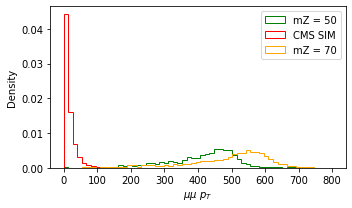

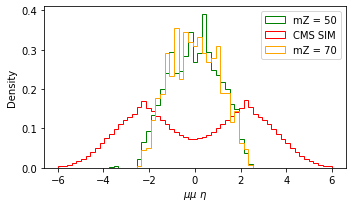

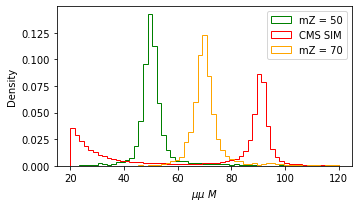

In [4]:
feature_set = [9, 10, 12]
    
hist_all_features(codes_list, uncut_data, feature_set, kwargs_dict_dtype)
    


## Make cuts

Now let's define cuts on the data. 

Muon cuts were made previously (and we don't want to make cuts on the dimuon system, either)

In [5]:
# jet_cuts

jet_pt_cut = 15 
jet_eta_cut = 2.4

cut_data = {}
for code in codes_list:
    
    # pt_cut, eta cut on the jets
    pass_indices = (uncut_data[code][:,0] > jet_pt_cut) & (np.abs(uncut_data[code][:,1]) < jet_eta_cut) # MAKE SURE THE INDICES ARE OK
    cut_data[code] = uncut_data[code][pass_indices]
    print(f"{code} has shape {cut_data[code].shape} after cuts")
    

wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full has shape (6406, 13) after cuts
cmssim has shape (5746300, 13) after cuts
wp_wzpythia_forcms_charge-mz70.0-mw60.0-mwp1200_full has shape (5433, 13) after cuts


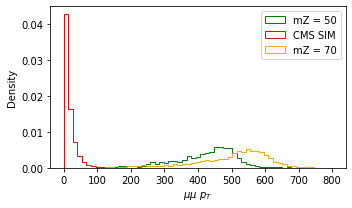

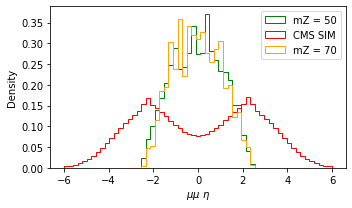

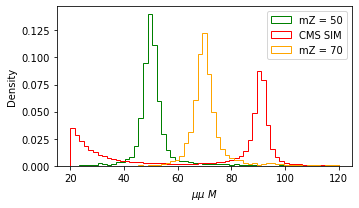

In [6]:
    
    
hist_all_features(codes_list, cut_data, feature_set, kwargs_dict_dtype, image_path = "plots/sim_v_od")
    

## Define SR / SB

Signal region can be anywhere from 10 - 90 geV

In [7]:
band_bounds = {"SBL": [15, 35],
               "IBL": [35, 40],
               "SR": [40, 60],
               "IBH": [60, 65],
               "SBH": [65, 80],
                       }

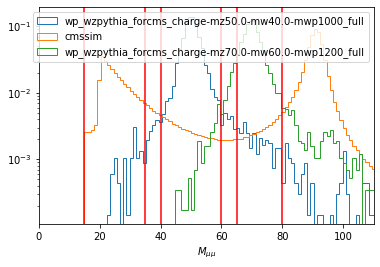

In [8]:
plt.figure()

for code in codes_list:
    plt.hist(cut_data[code][:,-1], bins = np.linspace(15, 120, 100), histtype = "step", density = "True", label = code)

plt.legend()
plt.axvline(band_bounds["SBL"][0], color= "red")
plt.axvline(band_bounds["IBL"][0], color= "red")
plt.axvline(band_bounds["SR"][0], color= "red")
plt.axvline(band_bounds["IBH"][0], color= "red")
plt.axvline(band_bounds["SBH"][0], color= "red")
plt.axvline(band_bounds["SBH"][1], color= "red")

plt.xlabel("$M_{\mu\mu}$")

plt.xlim(0, 110)
plt.yscale("log")
plt.show()

In [9]:
SR_data_preprocc = {}
SBL_data_preprocc = {} # sideband low
SBH_data_preprocc = {} # sideband high
IBL_data_preprocc = {} # innerband low
IBH_data_preprocc = {} # innerband high

bands = ["SBL", "IBL", "SR", "IBH", "SBH"]

preproc_dicts = {b:{} for b in bands}


for code in codes_list:
    
    for b in bands:

        loc_pass_indices = (cut_data[code][:,-1] > band_bounds[b][0]) & (cut_data[code][:,-1] < band_bounds[b][1])
        preproc_dicts[b][code] = cut_data[code][loc_pass_indices]

        print(f"{code} {b} has shape {preproc_dicts[b][code].shape}")
   
    
    

wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full SBL has shape (71, 13)
wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full IBL has shape (92, 13)
wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full SR has shape (5813, 13)
wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full IBH has shape (129, 13)
wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full SBH has shape (188, 13)
cmssim SBL has shape (1508072, 13)
cmssim IBL has shape (152168, 13)
cmssim SR has shape (301326, 13)
cmssim IBH has shape (53348, 13)
cmssim SBH has shape (234644, 13)
wp_wzpythia_forcms_charge-mz70.0-mw60.0-mwp1200_full SBL has shape (0, 13)
wp_wzpythia_forcms_charge-mz70.0-mw60.0-mwp1200_full IBL has shape (0, 13)
wp_wzpythia_forcms_charge-mz70.0-mw60.0-mwp1200_full SR has shape (130, 13)
wp_wzpythia_forcms_charge-mz70.0-mw60.0-mwp1200_full IBH has shape (437, 13)
wp_wzpythia_forcms_charge-mz70.0-mw60.0-mwp1200_full SBH has shape (4495, 13)


In [10]:
#hist_all_features(codes_list, SR_data_preprocc, kwargs_dict, feature_bins)
#hist_all_features(codes_list, SB1_data_preprocc, kwargs_dict, feature_bins)
#hist_all_features(codes_list, SB2_data_preprocc, kwargs_dict, feature_bins)

## Signal injection


In [11]:
signal_model = "wp_wzpythia_forcms_charge-mz50.0-mw40.0-mwp1000_full"

N_bkg_SR_total = preproc_dicts["SR"]["cmssim"].shape[0]
N_sig_SR_total = preproc_dicts["SR"][signal_model].shape[0]

print(f"{N_bkg_SR_total} bkg in SR, {N_sig_SR_total} sig in SR")


301326 bkg in SR, 5813 sig in SR


In [12]:
# set aside some events for a testing
N_bkg_SR_test = 40000
N_sig_SR_test = 3500

N_bkg_SR_train = N_bkg_SR_total - N_bkg_SR_test
N_sig_SR_train = N_sig_SR_total - N_sig_SR_test

print(N_bkg_SR_train, N_sig_SR_train)

r_bkg = N_bkg_SR_train/N_bkg_SR_total

print("N_bkg_SR_train/N_bkg_SR_total", r_bkg)


261326 2313
N_bkg_SR_train/N_bkg_SR_total 0.8672534066094529


Because we set aside some events for a test set, the SR now effectively contains a reduced number of background events, as scaled by `r_bkg`.

If there were no test set, we would:

- Inject a certain number of events `N_sig_inject_SR` into the SR, calculated from the desired significance
- Calculate what fraction of the total number of signal events this represents, `N_sig_inject_SR/N_sig_SR_total`
- Inject this same fraction of the sig events we have in each band into the bkg in each band.

However, we must scale this fraction up by `r_bkg` to reflect the fact that we've removed some bkg events in the SR only

In [13]:
# calculate how many signal events to inject into the SR
desired_significance = 2
N_sig_inject_SR = int(np.sqrt(N_bkg_SR_train)*desired_significance)

frac_sig_to_inject_nonSR = N_sig_inject_SR/(N_sig_SR_total*r_bkg)
print(f"Frac inject in SR:", N_sig_inject_SR/(N_sig_SR_total), "frac inject out of SR:", frac_sig_to_inject_nonSR)

print(f"Attempting to inject {N_sig_inject_SR} events into the SR.")
print(f"Available signal event pool: {N_sig_SR_train}.")

print(f"Desired significance in SR: {desired_significance}, S/B in SR: {N_sig_inject_SR/N_bkg_SR_train}.")


Frac inject in SR: 0.17581283330466196 frac inject out of SR: 0.20272371600361452
Attempting to inject 1022 events into the SR.
Available signal event pool: 2313.
Desired significance in SR: 2, S/B in SR: 0.003910824028225282.


In [14]:
num_signal_events_to_inject = {}

for b in bands:
    if b == "SR": 
        num_signal_events_to_inject[b] = N_sig_inject_SR
        #print(int(frac_sig_to_inject_nonSR*preproc_dicts[b][signal_model].shape[0]))
    else:
        num_signal_events_to_inject[b] = int(frac_sig_to_inject_nonSR*preproc_dicts[b][signal_model].shape[0])
    print(b, num_signal_events_to_inject[b])

SBL 14
IBL 18
SR 1022
IBH 26
SBH 38


In [15]:
# then do the injection

from sklearn.utils import shuffle

preproc_dicts_s_inj = {}

for b in bands:
    if b == "SR": 
        sig_events_to_inject_inds = np.random.choice(range(N_sig_SR_test, N_sig_SR_test+N_sig_SR_train), size=num_signal_events_to_inject[b], replace=False)
        sig_events_to_inject = preproc_dicts[b][signal_model][sig_events_to_inject_inds]
        band_data = np.vstack((preproc_dicts[b]["cmssim"][N_bkg_SR_test:], sig_events_to_inject))
    else:
        sig_events_to_inject_inds = np.random.choice(range(preproc_dicts[b][signal_model].shape[0]), size=num_signal_events_to_inject[b], replace=False)
        sig_events_to_inject = preproc_dicts[b][signal_model][sig_events_to_inject_inds]
        band_data = np.vstack((preproc_dicts[b]["cmssim"], sig_events_to_inject))
        
    preproc_dicts_s_inj[b] = shuffle(band_data)
    
# test sets
test_sets = {
    "bkg": preproc_dicts["SR"]["cmssim"][:N_bkg_SR_test],
    "sig": preproc_dicts["SR"][signal_model][:N_sig_SR_test]
}


## Preprocessing

Standard scaling is fine

In [16]:
save_scaler = True


In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

#rescale_feats = [5, 6, 7, 8, 9]
rescale_feats = [9]

proc_dict_s_inj = {b:{} for b in bands}


if save_scaler:
    SB_all = np.vstack((preproc_dicts_s_inj["SBL"], preproc_dicts_s_inj["SBH"]))
    scaler = StandardScaler()
    scaler = scaler.fit(SB_all)
    with open(f"processed_data/scaler", "wb") as ofile:
        pickle.dump(scaler, ofile)
else:
    with open(f"processed_data/scaler", "rb") as ifile:
        scaler = pickle.load(ifile)
    
for b in bands:
    proc_dict_s_inj[b]["s_inj_data"] = scaler.transform(preproc_dicts_s_inj[b])
    for ii in rescale_feats:
         proc_dict_s_inj[b]["s_inj_data"][:,ii] = (proc_dict_s_inj[b]["s_inj_data"][:,ii]-22)/6

# test sets
for key in test_sets.keys():
    test_sets[key] = scaler.transform(test_sets[key])
    for ii in rescale_feats:
        test_sets[key] [:,ii] = (test_sets[key] [:,ii]-22)/6

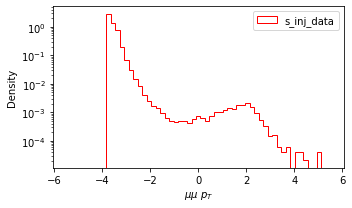

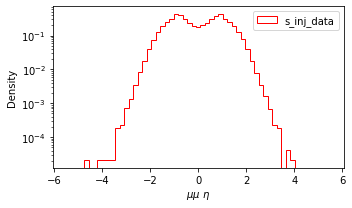

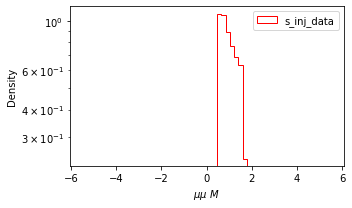

In [18]:
hist_all_features(["s_inj_data"], proc_dict_s_inj["SR"], feature_set, kwargs_dict_dtype, 
                  scaled_features = True, plot_bound = 5.5, yscale_log = True)


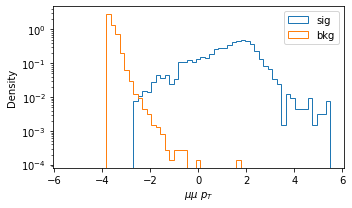

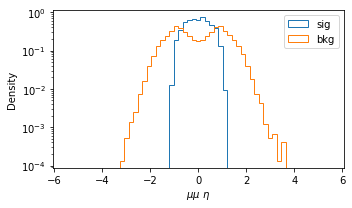

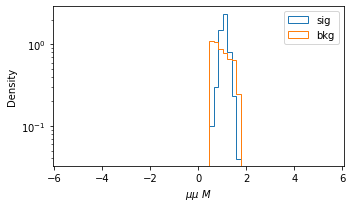

In [19]:
hist_all_features(["sig", "bkg"], test_sets, feature_set, {"sig":{"histtype":"step", "density":True, "label":"sig"}, "bkg":{"histtype":"step", "density":True, "label":"bkg"}}, 
                  scaled_features = True, plot_bound = 5.5, yscale_log = True)


In [21]:

for b in bands:
    np.save(f"processed_data/s_inj_{b}.npy", proc_dict_s_inj[b]["s_inj_data"])


for key in test_sets.keys():
    
    np.save(f"processed_data/test_{key}.npy", test_sets[key])
    